# Ideas

- Have a visualization where you have an isoceles triangle and you drag the point to see how much you are scaling the distance by
- draw of the isoceles triangle to clarify a few things

# Generating fractal triangles

In [77]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [45]:
DEPTH = 3          # number of levels of the pattern to generate
NUM_TRIANGLES = 4  # number of triangles to include in pattern
SCALE = 1.4        # How much do you want the triangles to scale the length of a straight line 

What should be the length of the sides of a triangle such that it scales the total length of a straight line by `SCALE`?

Assuming we are creating isoceles triangles, we can think of the straight line as the base of the triangle and we can think of the length as the sum of the two equal sides. Therefore the question boils down to how do we define the triangle such that: 

$$ 
2 * side = base * scale \implies side = base * scale / 2
$$ 

<center>
    <!-- <img src="equilateral-triangle.png" width=500 height=500 /> -->
    <img src="IsoscelesTriangle_800.svg" width=300 height=300 />
</center>


How do I get the coordinates of the third point such that the above holds? we know that the third point as x coor which is the middle of base and a hypothenus of $scale/2$ for the right angle triangle formed by the height of the triangle. Therefore we can determine the height of the triangle as 
$$
hypotenus = base *scale / 2
$$
$$
height = \sqrt{hypothenus^2 - {(\frac{base}{2})}^2} \implies height = \sqrt{ {(\frac{base *scale}{2})}^2 - (\frac{base}{2})^2}
$$

Finally, this gives us the third point on the triangle as $p = \Big(\frac{base}{2}, \sqrt{ {(\frac{base * scale}{2})}^2 - {(\frac{base}{2})}^2}\Big)$

If we want to scale this to $n$ triangles then it is as if we divide the original base by $n$ and then work on $n$ isoceles triangles of base size $base/n$

In [3]:
Point = lambda x: np.array(x)

In [65]:
p1 = Point([0, 0])
p2 = Point([2, 0])

def compute_scale_point(p1, p2, scale):
    # compute height
    line = p2 - p1
    base = np.linalg.norm(line)
    side = base * scale / 2
    height = np.sqrt(side ** 2 - (base / 2) ** 2)

    '''
    2 directions for normal
    
    Point([-line[1], line[0]]) 
    Point([line[1], -line[0]])
    '''
    
    normal = Point([-line[1], line[0]]) 
    unit_normal = normal / np.linalg.norm(normal)

    # determine point location
    mid_point = 1 / 2 * p1 + 1 /2 * p2
    return mid_point + unit_normal * height

In [66]:
def plot_points(points):

    # extract x's
    xs = [x for x, y in points]
    # extract y's
    ys = [y for x, y in points]
    # plot 
    plt.plot(xs, ys)
    plt.show()

In [67]:
compute_scale_point(p1, p2, 1)

array([1., 0.])

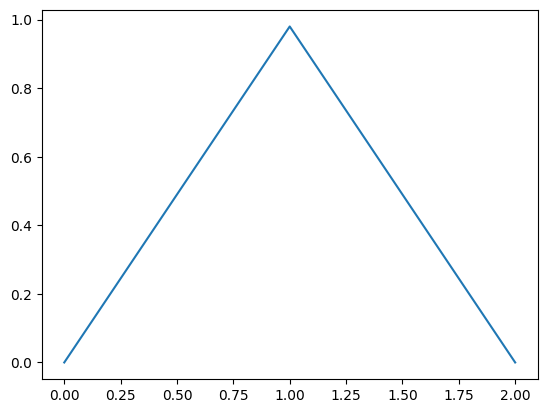

In [69]:
plot_points([p1, compute_scale_point(p1, p2, SCALE), p2])

We can see that the triangle side lengths are equal to $base * scale / 2$! we managed to scale the distance by `SCALE` making it zigzagy

# Scale to multiple triangles

In [ ]:
# Given a number of triangles, n
# divide line into n and act on each n

In [116]:
NUM_TRIANGLES = 10
p1 = Point([0, 0])
p2 = Point([2, 1])

In [117]:
'''
divide line into n (actually n + 1 because we need 1 extra point to have n triangles)
and the point will be p1 + subsection of line 
'''
line = p2 - p1
subpoints = [p1 + i * line / (NUM_TRIANGLES + 1) for i in range(NUM_TRIANGLES + 1)]

In [118]:
midpoints = [compute_scale_point(a, b, SCALE) for a, b in itertools.pairwise(subpoints)]

In [119]:
points = []
for p, m in itertools.zip_longest(subpoints, midpoints):
    points.append(p)
    if not m is None:
        points.append(m)

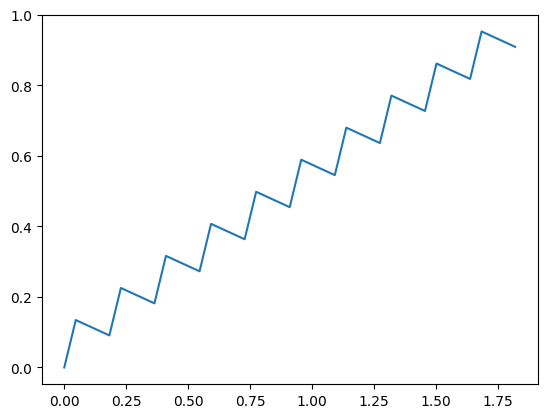

In [120]:
plot_points(points)

We've scaled our distance by a factor of `SCALE` by using triangles with side length = $base * \frac{scale}{2n}$. (I have $2n$ side so total length = $base * scale$)

# Ipython widgets

In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [12]:
def f(x):
    plt.plot([x], [1], 'bo')
    plt.show()

In [13]:
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…